<a href="https://colab.research.google.com/github/harshadapatil14/Handwritten-digit_classification/blob/main/Handwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Handwritten Digit classification using Deep Learning


In this project, we will use the Keras dataset MNIST to detect handwritten digits. We are going to use CNN(Convolution Neural Network) for detection. Here is our approach to identifying the handwritten digit using CNN, and beginning with only input and output layers then add tried hidden layers.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [ ]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

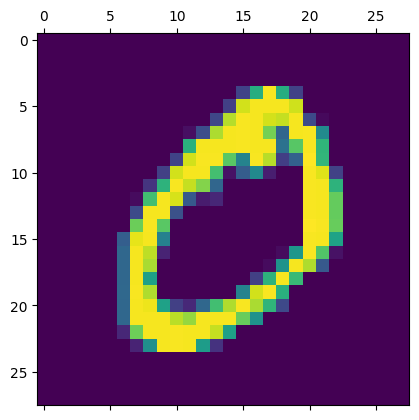

In [ ]:
plt.matshow(X_train[1])

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train/255
X_test = X_test/255

For create input layer we have to flatten the X_train means convert the 2D-1D array.

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)


In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# keras.Sequential is mean we have stack of layers like one another one
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid") # Dense mean every one neuron connect with other neuron
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4675 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9247
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2668 - accuracy: 0.9255


Above model accuracy is reached to 92% with 0.22 loss on train dataset. After scale the X_train and X_test dataset the model accuracy was increase and loss was reduced.



Now we model predict on unseen dataset.

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2667 - accuracy: 0.9256


[0.26670461893081665, 0.925599992275238]

The prediction on unseen data model accuracy is 92% which is really good.

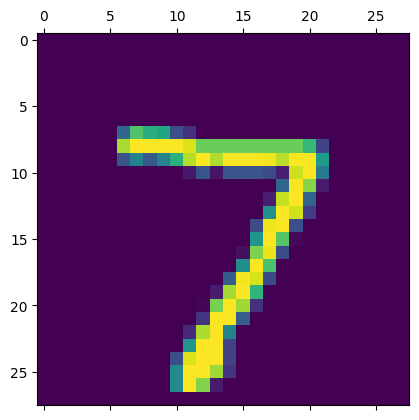

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.7562378e-02, 5.8467560e-07, 6.3353337e-02, 9.5988327e-01,
       2.7713859e-03, 1.5951237e-01, 1.9867236e-06, 9.9982178e-01,
       1.0601840e-01, 7.0543396e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

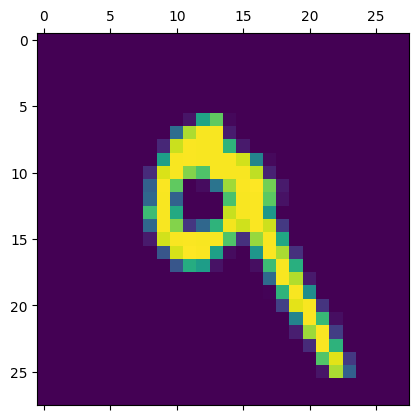

In [ ]:
plt.matshow(X_test[7])

In [ ]:
np.argmax(y_predicted[7])

9

In [ ]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[0]

7

Here i create confusion metrics using sklearn library is create Confusion metrics and other way using tensorflow, Both are same.

In [ ]:
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_predicted_label)
cm

array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  936,   15,    8,    2,   13,    9,   30,    4],
       [   4,    0,   21,  926,    0,   20,    2,   11,   19,    7],
       [   1,    2,    3,    1,  920,    0,   11,    4,    7,   33],
       [  10,    3,    3,   34,   10,  775,   17,    5,   29,    6],
       [  13,    3,    8,    1,    7,   10,  912,    2,    2,    0],
       [   1,    7,   25,    7,    9,    1,    0,  944,    1,   33],
       [  11,   10,    8,   29,    9,   26,   10,   13,  853,    5],
       [  11,    7,    1,   10,   35,    8,    0,   23,    6,  908]])

In [ ]:
cm_2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)
cm_2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  936,   15,    8,    2,   13,    9,   30,    4],
       [   4,    0,   21,  926,    0,   20,    2,   11,   19,    7],
       [   1,    2,    3,    1,  920,    0,   11,    4,    7,   33],
       [  10,    3,    3,   34,   10,  775,   17,    5,   29,    6],
       [  13,    3,    8,    1,    7,   10,  912,    2,    2,    0],
       [   1,    7,   25,    7,    9,    1,    0,  944,    1,   33],
       [  11,   10,    8,   29,    9,   26,   10,   13,  853,    5],
       [  11,    7,    1,   10,   35,    8,    0,   23,    6,  908]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

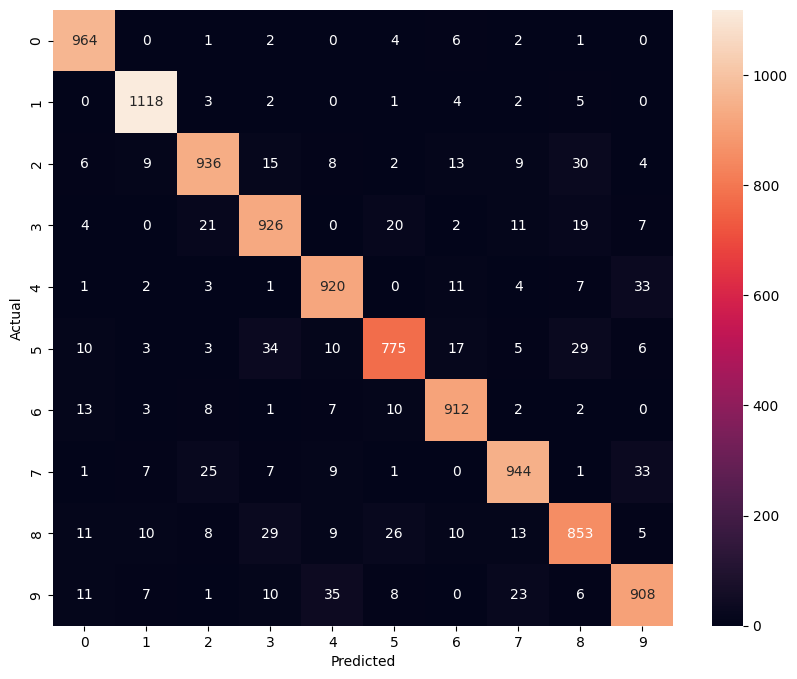

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

Now we add hidden layer.

In [ ]:
# keras.Sequential is mean we have stack of layers like one another one
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="sigmoid"),
    keras.layers.Dense(10,activation="sigmoid") # Dense mean every one neuron connect with other neuron
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4280 - accuracy: 0.8906
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2055 - accuracy: 0.9412
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1532 - accuracy: 0.9560
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1207 - accuracy: 0.9654
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0987 - accuracy: 0.9719


Using the keras.layers.Flatten() we can flatten the X_train, so we don't need to do that manually.

In [ ]:
# keras.Sequential is mean we have stack of layers like one another one
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10,activation="sigmoid") # Dense mean every one neuron connect with other neuron
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2710 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1233 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0858 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0647 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0518 - accuracy: 0.9841


The model accuracy is 98% with minimun loss 0.05.

**Inference** : Using the keras Mnist dataset performed the deep learning task. This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. Firstly create a simple model that contains only the input and output layers, and the train the model on train set check accuracy and loss of model. The loss is so high and accuracy is also not good. Then add one hidden layer with 100 neurons and again train model and predicted on unseen data after adding hidden layer the accuracy of model get increase and loss gets reduce.  